# Proyecto - Módulo 2

20/04/2023
## Simulación de portafolios de inversión
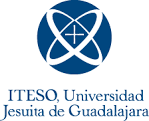

**Integrantes:**

*Alberto Marín*

  - Exp: 740526 Correo: alberto.marin@iteso.mx

*Ana Luisa Espinoza López*

  - Exp: 734753 Correo: ana.espinoza@iteso.mx


*Kevin Emiliano Ayala Montoya*

  - Exp:745973  Correo: @iteso.mx

## Objetivos

1. Objetivo General
    - Simular portafolios de inversión modificando la diversificación de los activos para comparar su rendimiento. 
    

2. Objetivos Específicos
    - Comparar el rendimiento de un portafolio variando los activos dentro de un mismo sector utilizando simulaciones
    - Utilizar la simulación para comparar el rendimiento de un portafolio modificando el peso de cada acción

# Modelo que representa el problema

Para realizar las simulaciones se requirieron parámetros estadísticos de cada conjunto de datos con el fin de poder simular su comportamiento. Estos parámetros son la media y desviación estándar. La media se puede definir como un valor promedio de un conjunto de datos numéricos, se calcula de la siguiente manera (López, 2021):

$$\bar{x} = \frac{\sum_{i=1}^{n}{x_i}}{n} $$

En la misma línea, la desviación estándar es otra medida estadística que calcula la dispersión media de una variable. Es decir, mide la dispersión de los datos con relación a la media aritmética (López, 2020). Se calcula de la siguiente forma: 

$$σ = \sqrt{\frac{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}{n}} $$

De acuerdo con Poldrack (2021), utilizando estas medidas estadísticas es posible establecer un dominio posible de valores y una distribución de probabilidad. A partir de esto, es posible realizar la simulación Montecarlo con números aleatorios dentro de este dominio para estimar la probabilidad de un resultado específico repitiendo el proceso cualquier cantidad de veces. 

In [114]:
# Instalación del paquete
!pip install yfinance

# conda install pandas-datareader
# pip install pandas-datareader

In [115]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]


## Planteamiento del problema

Se proponen dos portafolios de inversión, ambos con seis activos pero modificando el porcentaje de inversión de capital en cada uno y modificando los activos en los que se invertirán. Se utilizará la simulación montecarlo para poder evaluar, visualizar y comparar el rendimiento de los distintos portafolios y determinar cual es el mejor de ellos.

![portafolios.png](attachment:portafolios.png)

### Portafolio 1
a1 = "VTSMX"
a2 = "VGSIX"
a3 = "VTMGX"
a4 = "VEIEX"
a5 = "TLT"
a6 = "VIPSX"
Cap = 10000
c1 = Cap*0.30
c2 = Cap*0.20
c3 = Cap*0.15
c4 = Cap*0.05
c5 = Cap*0.15
c6 = Cap*0.15

In [117]:
a1 = "VTSMX"
a2 = "VGSIX"
a3 = "VTMGX"
a4 = "VEIEX"
a5 = "TLT"
a6 = "VIPSX"
Cap = 10000
c1 = Cap*0.30
c2 = Cap*0.20
c3 = Cap*0.15
c4 = Cap*0.05
c5 = Cap*0.15
c6 = Cap*0.15
ticker = a1,a2,a3,a4,a5,a6
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2015-01-01" #inicio de datos
final = "2019-12-31" #final de datos
fecha = "2020-01-01" # Primer dato a simular
ffinal = "2022-12-31" #ultimo dato a simular
per = 365*3 # Datos futuros a simular
data_aapl = getClose(ticker,inicio,final)
#data_aapl.plot.hist()


[*********************100%***********************]  6 of 6 completed


In [118]:
data_aapl.describe()

,TLT,VEIEX,VGSIX,VIPSX,VTMGX,VTSMX
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,111.378375,21.816248,22.462099,10.658743,10.938287,56.166921
std,8.147650,2.690534,2.266176,0.315630,1.145631,9.438039
min,96.759964,15.037103,17.975235,10.073912,8.385990,40.122345
25%,105.776260,19.943319,20.867243,10.497035,9.846577,46.652321
50%,109.938103,22.064116,22.285051,10.620102,11.068616,55.615551
75%,113.537025,23.968910,23.301210,10.751198,12.013560,64.614105
max,137.883011,28.038670,28.314684,11.560161,13.246050,76.494553


Calcule los rendimientos diarios junto con sus características estadísticas

<AxesSubplot:ylabel='Frequency'>

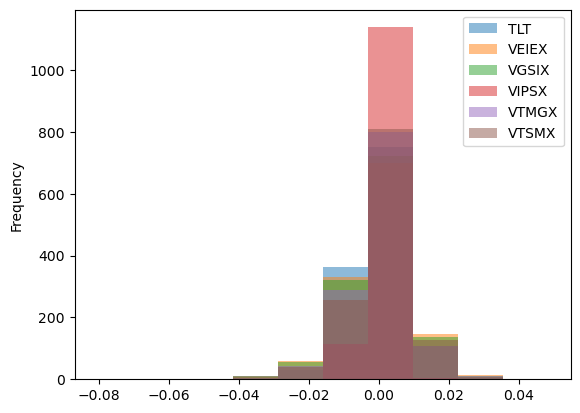

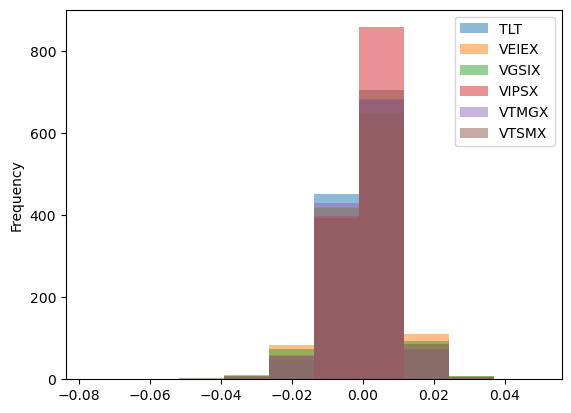

In [119]:
R = (data_aapl - data_aapl.shift())/data_aapl.shift()
r = np.log(data_aapl/data_aapl.shift())

r.plot.hist(alpha = 0.5)
R.plot.hist(alpha = 0.5)

In [120]:
R_1_mean = R[a1].mean()
R_1_std = R[a1].std()

R_2_mean = R[a2].mean()
R_2_std = R[a2].std()

R_3_mean = R[a3].mean()
R_3_std = R[a3].std()

R_4_mean = R[a4].mean()
R_4_std = R[a4].std()

R_5_mean = R[a5].mean()
R_5_std = R[a5].std()

R_6_mean = R[a6].mean()
R_6_std = R[a6].std()


In [121]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_1_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_2_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_3_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_4_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_5_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_6_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)


In [122]:
ra_1_simulados = (r_1_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_2_simulados = (r_2_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_3_simulados = (r_3_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_4_simulados = (r_4_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_5_simulados = (r_5_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_6_simulados = (r_6_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_6_simulados

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.993400,0.997368,0.999132,0.985117,0.994819,1.000051,1.001083,1.016398,0.992048,0.981778,...,0.990164,0.987713,0.999736,1.013877,1.015925,0.994147,0.989680,1.005066,1.007192,0.983132
2020-01-02,0.981040,1.005028,1.008987,0.996787,0.996634,0.990228,0.992995,1.016558,0.993498,0.988605,...,0.994722,0.967511,1.009533,1.009767,0.996419,0.995353,0.991246,0.996425,1.013176,0.968124
2020-01-03,0.980908,0.999189,1.002082,1.012399,0.990424,0.981718,0.994836,1.010779,1.009279,0.980288,...,0.999660,0.969756,1.010771,1.015193,1.002300,1.014448,0.979075,0.964629,1.030515,0.971292
2020-01-04,0.982795,1.005446,1.002344,1.012931,1.002605,0.991580,0.995526,1.011355,0.996861,0.970598,...,0.996983,0.977434,1.029617,1.015746,1.003922,1.021734,0.976761,0.966677,1.028742,0.969184
2020-01-05,0.986014,1.001984,1.011585,1.022288,1.011492,0.983172,1.004601,1.024343,0.994143,0.953369,...,1.009515,0.979502,1.023131,1.018321,1.009420,1.040323,0.989460,0.965679,1.024746,0.970933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.258057,1.553107,1.516923,1.692661,2.298551,1.132314,1.175826,1.672620,0.943653,1.079473,...,1.712714,1.777754,1.025375,1.867421,1.481354,1.374055,1.121164,1.133508,2.083112,1.320189
2022-12-27,1.281097,1.563315,1.501526,1.692458,2.287200,1.128419,1.173268,1.669238,0.941246,1.067024,...,1.717399,1.781606,1.033289,1.869158,1.474258,1.369407,1.126324,1.126736,2.091471,1.314611
2022-12-28,1.290249,1.571052,1.510269,1.687992,2.278032,1.144653,1.162863,1.631337,0.931305,1.054564,...,1.742708,1.789698,1.018137,1.858465,1.468416,1.382698,1.135633,1.122151,2.104564,1.319197
2022-12-29,1.308861,1.582633,1.493731,1.677346,2.279532,1.144161,1.176767,1.632442,0.916676,1.057006,...,1.749138,1.799117,1.028893,1.843694,1.448220,1.388600,1.143377,1.125206,2.057783,1.294193


Calcule los precios con base en los rendimientos simulados

In [123]:
precios_1_simulados = ((r_1_simulados + 1).cumprod()*c1).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_2_simulados = ((r_2_simulados + 1).cumprod()*c2).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_3_simulados = ((r_3_simulados + 1).cumprod()*c3).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_4_simulados = ((r_4_simulados + 1).cumprod()*c4).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_5_simulados = ((r_5_simulados + 1).cumprod()*c5).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados = ((r_6_simulados + 1).cumprod()*c6).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados

2020-01-01    1500.895381
2020-01-02    1500.981460
2020-01-03    1500.833007
2020-01-04    1501.591682
2020-01-05    1502.453781
                 ...     
2022-12-26    2412.078562
2022-12-27    2413.138130
2022-12-28    2414.496143
2022-12-29    2416.567802
2022-12-30    2417.726912
Freq: D, Length: 1095, dtype: float64

In [124]:
m1 = pd.DataFrame(precios_1_simulados)
m2 = pd.DataFrame(precios_2_simulados)
m3 = pd.DataFrame(precios_3_simulados)
m4 = pd.DataFrame(precios_4_simulados)
m5 = pd.DataFrame(precios_5_simulados)
m6 = pd.DataFrame(precios_6_simulados)


In [125]:

df = pd.concat([m1,m2,m3,m4,m5,m6], axis=1)
df

,0,0,0,0,0,0
2020-01-01,3000.379914,2000.569318,1501.060224,500.246510,1500.405832,1500.895381
2020-01-02,3001.587172,2000.380858,1502.365557,500.214315,1500.573922,1500.981460
2020-01-03,3002.472380,2001.718006,1503.425015,500.474185,1501.612975,1500.833007
2020-01-04,3003.234483,2001.188096,1503.310109,500.539656,1502.722866,1501.591682
2020-01-05,3005.089248,2001.698658,1504.466928,500.675430,1503.360009,1502.453781
...,...,...,...,...,...,...
2022-12-26,4871.129450,2718.765480,2454.457530,681.063800,2446.090748,2412.078562
2022-12-27,4875.388049,2720.766543,2455.782537,681.220739,2447.594596,2413.138130
2022-12-28,4877.260924,2722.769043,2456.887717,681.212795,2449.199800,2414.496143
2022-12-29,4878.329206,2723.742765,2456.209477,681.280251,2451.338152,2416.567802


In [126]:
l = df.sum(axis=1)
#l.plot()

In [127]:

data = getClose(ticker,fecha,ffinal)

R = (data - data.shift())/data.shift()
#R

[*********************100%***********************]  6 of 6 completed


In [128]:
rendimientos_1 = (R[a1] + 1).cumprod()*c1
rendimientos_2 = (R[a2] + 1).cumprod()*c2
rendimientos_3 = (R[a3] + 1).cumprod()*c3
rendimientos_4 = (R[a4] + 1).cumprod()*c4
rendimientos_5 = (R[a5] + 1).cumprod()*c5
rendimientos_6 = (R[a6] + 1).cumprod()*c6
rendimientos_6

Date
2020-01-02            NaN
2020-01-03    1506.797474
2020-01-06    1502.265825
2020-01-07    1498.867025
2020-01-08    1496.601201
                 ...     
2022-12-23    1544.360781
2022-12-27    1540.447740
2022-12-28    1539.143351
2022-12-29    1543.056393
2022-12-30    1537.838963
Name: VIPSX, Length: 756, dtype: float64

In [129]:
g1 = pd.DataFrame(rendimientos_1)
g2 = pd.DataFrame(rendimientos_2)
g3 = pd.DataFrame(rendimientos_3)
g4 = pd.DataFrame(rendimientos_4)
g5 = pd.DataFrame(rendimientos_5)
g6 = pd.DataFrame(rendimientos_6)
g1 = pd.DataFrame.dropna(g1)
g2 = pd.DataFrame.dropna(g2)
g3 = pd.DataFrame.dropna(g3)
g4 = pd.DataFrame.dropna(g4)
g5 = pd.DataFrame.dropna(g5)
g6 = pd.DataFrame.dropna(g6)

In [130]:

dg = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
dg # DataFrame de los datos de los activos multiplicado por el capital invertido en cada uno

,VTSMX,VGSIX,VTMGX,VEIEX,TLT,VIPSX
Date,,,,,,
2020-01-03,2981.312653,2017.763048,1488.413017,495.460855,1523.100558,1506.797474
2020-01-06,2991.404094,2019.078794,1490.519582,492.492999,1514.451475,1502.265825
2020-01-07,2983.929096,1995.394544,1488.413017,493.191354,1507.007185,1498.867025
2020-01-08,2998.131920,2002.631630,1488.413017,492.842123,1497.043944,1496.601201
2020-01-09,3017.191812,2002.631630,1493.679648,498.254203,1502.299865,1497.733926
...,...,...,...,...,...,...
2022-12-23,3635.907926,2001.721145,1548.894670,463.724735,1179.709098,1544.360781
2022-12-27,3620.294735,2000.993230,1551.185901,468.833096,1156.382797,1540.447740
2022-12-28,3575.406924,1966.782046,1536.292566,465.616744,1149.569753,1539.143351


### Gráfica del monto 


Text(0.5, 1.0, 'Monto de Simulación')

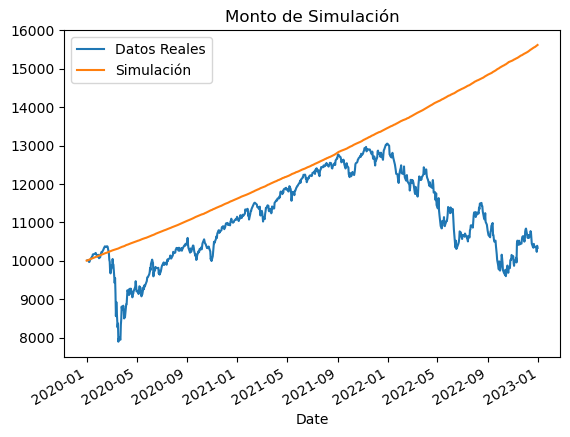

In [131]:
k = dg.sum(axis=1)
k.plot(label="Datos Reales")
l.plot(label="Simulación")
plt.legend(loc="best")
plt.title("Monto de Simulación")

In [132]:
print(k.describe()) #data
#print(l.describe()) #simulacion

count      755.000000
mean     11079.214631
std       1113.999892
min       7892.857402
25%      10239.306796
50%      11035.673373
75%      12111.818190
max      13049.256501
dtype: float64


### Gráfica del rendimiento acumulado.

Text(0.5, 1.0, 'Rendimiento Acumulado')

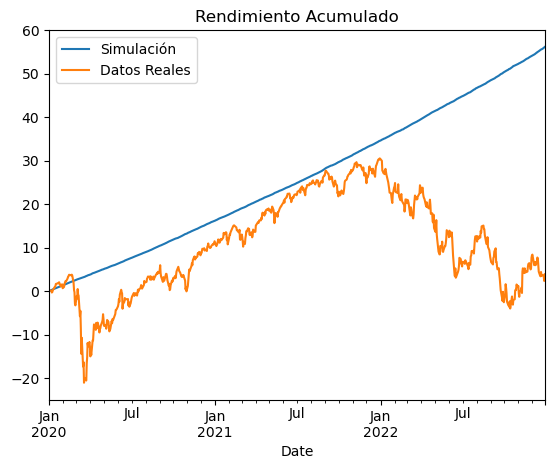

In [133]:
rend_data = ((k/Cap)-1)*100
rend_simulacion = ((l/Cap)-1)*100
x = 0

rend_simulacion.plot(label="Simulación")
rend_data.plot(label="Datos Reales")
plt.legend(loc="best")
plt.title("Rendimiento Acumulado")

### Rendimientos simulados y reales diarios del portafolio completo.

Text(0.5, 1.0, 'Simulación de Rendimientos')

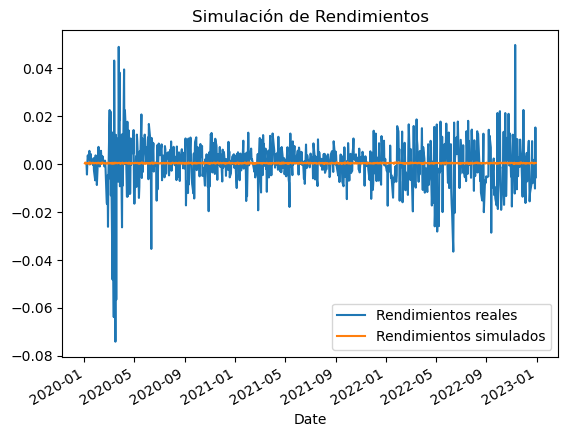

In [21]:
Rend_data = ((k - k.shift())/k.shift())
Rend_data.plot(label="Rendimientos reales")
Rend_sim = ((l - l.shift())/l.shift())
Rend_sim.plot(label="Rendimientos simulados")
plt.legend(loc="best")
plt.title("Simulación de Rendimientos")

### Mayor pérdida

In [134]:
print("Mayor perdida según la simulación     ",int(rend_simulacion.min()),"%")
print("Mayor perdida según la data historica ",int(rend_data.min()),"%")

Mayor perdida según la simulación      0 %
Mayor perdida según la data historica  -21 %


### Rendimiento final acumulado

In [135]:
print("Rendimiento final según la simulación     ",int(rend_simulacion[-1]),"%")
print("Rendimiento final según la data historica ",int(rend_data[-1]),"%")

Rendimiento final según la simulación      56 %
Rendimiento final según la data historica  3 %


### Portafolio 2
a1 = "NKLA"
a2 = "BNGO"
a3 = "AMC"
a4 = "TQQQ"
a5 = "KO"
a6 = "ATOS"
Cap = 10000
c1 = Cap*1/6
c2 = Cap*1/6
c3 = Cap*1/6
c4 = Cap*1/6
c5 = Cap*1/6
c6 = Cap*1/6

In [136]:
a1 = "NKLA"
a2 = "BNGO"
a3 = "AMC"
a4 = "TQQQ"
a5 = "KO"
a6 = "ATOS"
Cap = 10000
c1 = Cap*(1/6)
c2 = Cap*(1/6)
c3 = Cap*(1/6)
c4 = Cap*(1/6)
c5 = Cap*(1/6)
c6 = Cap*(1/6)
ticker = a1,a2,a3,a4,a5,a6
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2015-01-01" #inicio de datos
final = "2019-12-31" #final de datos
fecha = "2020-01-01" # Primer dato a simular
ffinal = "2022-12-31" #ultimo dato a simular
per = 365*3 # Datos futuros a simular
data_aapl = getClose(ticker,inicio,final)
#data_aapl.plot.hist()


[*********************100%***********************]  6 of 6 completed


<AxesSubplot:ylabel='Frequency'>

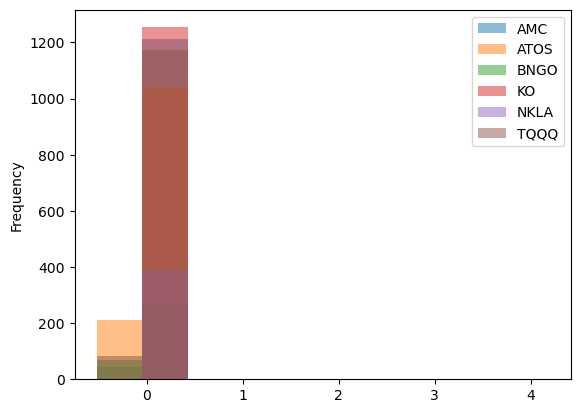

In [137]:
R = (data_aapl - data_aapl.shift())/data_aapl.shift()
r = np.log(data_aapl/data_aapl.shift())

R.plot.hist(alpha = 0.5)

In [138]:
R_1_mean = R[a1].mean()
R_1_std = R[a1].std()

R_2_mean = R[a2].mean()
R_2_std = R[a2].std()

R_3_mean = R[a3].mean()
R_3_std = R[a3].std()

R_4_mean = R[a4].mean()
R_4_std = R[a4].std()

R_5_mean = R[a5].mean()
R_5_std = R[a5].std()

R_6_mean = R[a6].mean()
R_6_std = R[a6].std()


In [139]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_1_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_2_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_3_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_4_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_5_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_6_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)


In [140]:
precios_1_simulados = ((r_1_simulados + 1).cumprod()*c1).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_2_simulados = ((r_2_simulados + 1).cumprod()*c2).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_3_simulados = ((r_3_simulados + 1).cumprod()*c3).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_4_simulados = ((r_4_simulados + 1).cumprod()*c4).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_5_simulados = ((r_5_simulados + 1).cumprod()*c5).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados = ((r_6_simulados + 1).cumprod()*c6).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados

2020-01-01    1666.924312
2020-01-02    1667.005492
2020-01-03    1667.477472
2020-01-04    1667.818799
2020-01-05    1668.037139
                 ...     
2022-12-26    2043.787409
2022-12-27    2044.320473
2022-12-28    2044.682981
2022-12-29    2045.019979
2022-12-30    2045.150255
Freq: D, Length: 1095, dtype: float64

In [141]:
m1 = pd.DataFrame(precios_1_simulados)
m2 = pd.DataFrame(precios_2_simulados)
m3 = pd.DataFrame(precios_3_simulados)
m4 = pd.DataFrame(precios_4_simulados)
m5 = pd.DataFrame(precios_5_simulados)
m6 = pd.DataFrame(precios_6_simulados)
df = pd.concat([m1,m2,m3,m4,m5,m6], axis=1)

In [142]:
df

,0,0,0,0,0,0
2020-01-01,1666.826810,1676.787108,1666.816336,1655.607677,1667.024953,1666.924312
2020-01-02,1667.240738,1690.341110,1667.085158,1668.397342,1667.329113,1667.005492
2020-01-03,1667.702736,1677.085677,1667.481291,1667.403839,1667.775677,1667.477472
2020-01-04,1668.033196,1680.061703,1667.804641,1681.404684,1668.169595,1667.818799
2020-01-05,1668.483178,1688.637904,1668.379960,1701.434926,1668.411052,1668.037139
...,...,...,...,...,...,...
2022-12-26,2046.112785,2.262889,2043.720049,0.289103,2039.687922,2043.787409
2022-12-27,2046.536040,2.824053,2044.159157,0.228458,2040.261164,2044.320473
2022-12-28,2047.022465,3.140895,2044.600985,0.182658,2040.650587,2044.682981
2022-12-29,2047.407906,2.641047,2044.909221,0.180648,2041.134357,2045.019979


In [143]:
l = df.sum(axis=1)
data = getClose(ticker,fecha,ffinal)

R = (data - data.shift())/data.shift()
#R

[*********************100%***********************]  6 of 6 completed


In [144]:
rendimientos_1 = (R[a1] + 1).cumprod()*c1
rendimientos_2 = (R[a2] + 1).cumprod()*c2
rendimientos_3 = (R[a3] + 1).cumprod()*c3
rendimientos_4 = (R[a4] + 1).cumprod()*c4
rendimientos_5 = (R[a5] + 1).cumprod()*c5
rendimientos_6 = (R[a6] + 1).cumprod()*c6


In [145]:
g1 = pd.DataFrame(rendimientos_1)
g2 = pd.DataFrame(rendimientos_2)
g3 = pd.DataFrame(rendimientos_3)
g4 = pd.DataFrame(rendimientos_4)
g5 = pd.DataFrame(rendimientos_5)
g6 = pd.DataFrame(rendimientos_6)
g1 = pd.DataFrame.dropna(g1)
g2 = pd.DataFrame.dropna(g2)
g3 = pd.DataFrame.dropna(g3)
g4 = pd.DataFrame.dropna(g4)
g5 = pd.DataFrame.dropna(g5)
g6 = pd.DataFrame.dropna(g6)
dg = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
dg

,NKLA,BNGO,AMC,TQQQ,KO,ATOS
Date,,,,,,
2020-01-03,1663.436772,1653.225819,1635.388743,1621.348960,1657.574196,1666.666667
2020-01-06,1666.666667,1706.989209,1590.705979,1652.172343,1656.968014,1656.184497
2020-01-07,1668.281691,1666.666667,1592.940155,1650.154191,1644.238453,1698.113177
2020-01-08,1670.219689,1666.666667,1478.999124,1688.133098,1647.268978,1687.631007
2020-01-09,1671.511739,1599.462430,1443.252956,1730.698844,1677.274528,1624.737861
...,...,...,...,...,...,...
2022-12-23,423.126609,2043.010711,989.051381,1297.614417,2124.602386,607.966427
2022-12-27,385.981941,1908.602078,905.881179,1242.286901,2137.585707,545.073344
2022-12-28,364.987089,1881.720384,863.172077,1192.123364,2116.279767,524.109004


Text(0.5, 1.0, 'Monto de Simulación')

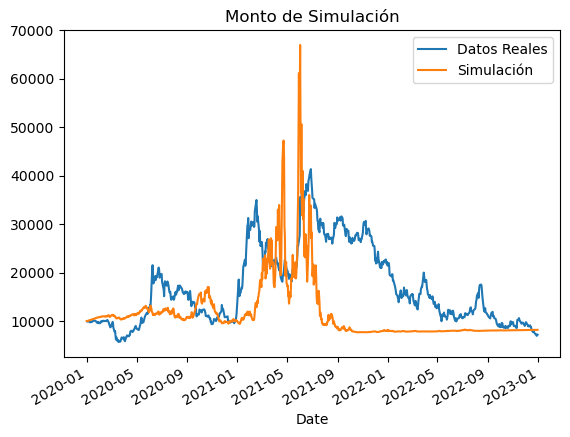

In [147]:
k = dg.sum(axis=1)
k.plot(label="Datos Reales")
l.plot(label="Simulación")
plt.legend(loc="best")
plt.title("Monto de Simulación")

Text(0.5, 1.0, 'Rendimiento Acumulado')

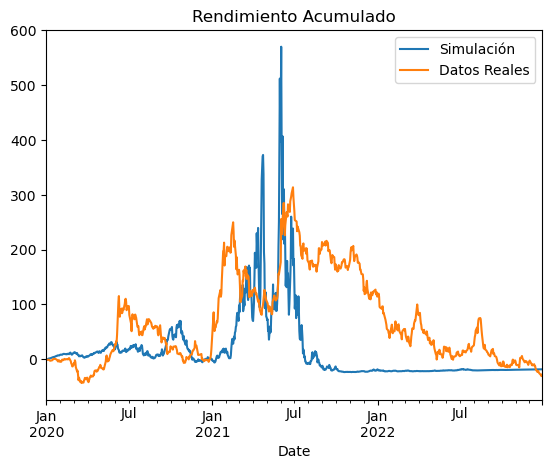

In [148]:
rend_data = ((k/Cap)-1)*100
rend_simulacion = ((l/Cap)-1)*100
x = 0

rend_simulacion.plot(label="Simulación")
rend_data.plot(label="Datos Reales")
plt.legend(loc="best")
plt.title("Rendimiento Acumulado")

### Rendimientos simulados y reales diarios del portafolio completo.

Text(0.5, 1.0, 'Simulación de Rendimientos')

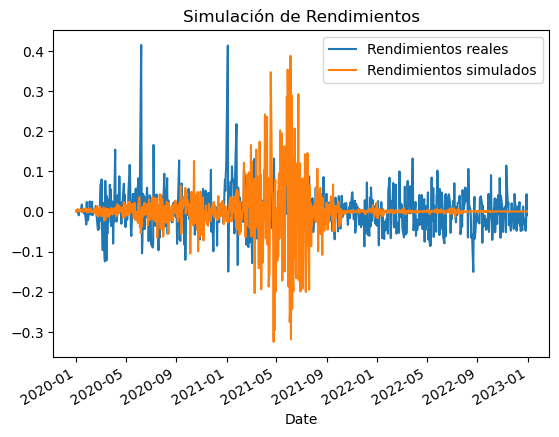

In [149]:
Rend_data = ((k - k.shift())/k.shift())
Rend_data.plot(label="Rendimientos reales")
Rend_sim = ((l - l.shift())/l.shift())
Rend_sim.plot(label="Rendimientos simulados")
plt.legend(loc="best")
plt.title("Simulación de Rendimientos")

### Mayor pérdida

In [150]:
print("Mayor perdida según la simulación     ",int(rend_simulacion.min()),"%")
print("Mayor perdida según la data historica ",int(rend_data.min()),"%")

Mayor perdida según la simulación      -23 %
Mayor perdida según la data historica  -42 %


### Rendimiento final acumulado

In [151]:
print("Rendimiento final según la simulación     ",int(rend_simulacion[-1]),"%")
print("Rendimiento final según la data historica ",int(rend_data[-1]),"%")

Rendimiento final según la simulación      -18 %
Rendimiento final según la data historica  -28 %


## Solución del problema

Se utilizó la simulación Montecarlo para poder evaluar y visualizar el posible rendimiento de un portafolio de inversión. Se logró expresar el monto final obtenido en base a un capital hipotético y observar qué ocurre con el capital invertido en cada acción. Cabe recalcar que con este método no es posible simular escenarios externos como la pandemia, situaciones políticas o globales que puedan afectar los rendimientos de los activos del portafolio.

## Conclusiones

Mediante la simulación, se pudo observar los diferentes escenarios en un portafolio de inversión con la misma cantidad de activos. Se puede concluir que el rendimiento del portafolio 1 es mayor que el del portafolio 2 y que tiene menos riesgo, por lo que la selección de activos y el porcentaje del capital invertido en cada activo son variables de suma importancia en el rendimiento esperado. Utilizando la simulación se pueden optimizar los portafolios, contrastar y visualizar de forma más fácil por lo que es una herramienta bastante útil en el sector financiero. 

### Referencias Bibliográficas
- López, J. F. (2022). Media. Economipedia. https://economipedia.com/definiciones/media.html
- López, J. F. (2022a). Desviación estándar o típica. Economipedia. https://economipedia.com/definiciones/desviacion-tipica.html
- Poldrack, R. (2021). Capítulo 8 Remuestreo y Simulación | Statistical Thinking for the 21st Century. https://statsthinking21.github.io/statsthinking21-core-spanish-site/resampling-and-simulation.html